## Preparación de datos para la regresión robusta

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import (
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.svm import SVR

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
df = pd.read_csv('./data/felicidad_corrupt.csv')
print(df.head())

       country  rank  score      high       low       gdp    family    lifexp  \
0       Norway     1  7.537  7.594445  7.479556  1.616463  1.533524  0.796667   
1      Denmark     2  7.522  7.581728  7.462272  1.482383  1.551122  0.792566   
2      Iceland     3  7.504  7.622030  7.385970  1.480633  1.610574  0.833552   
3  Switzerland     4  7.494  7.561772  7.426227  1.564980  1.516912  0.858131   
4      Finland     5  7.469  7.527542  7.410458  1.443572  1.540247  0.809158   

    freedom  generosity  corruption  dystopia  
0  0.635423    0.362012    0.315964  2.277027  
1  0.626007    0.355280    0.400770  2.313707  
2  0.627163    0.475540    0.153527  2.322715  
3  0.620071    0.290549    0.367007  2.276716  
4  0.617951    0.245483    0.382612  2.430182  


In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop(['country', 'score'], axis=1)
y = df[['score']]

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Define the regression models to use
estimadores = {
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
    'RANSAC': RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1.35)
}

SVR
MSE:  0.07455771301888525
Score 0.9664741348572501


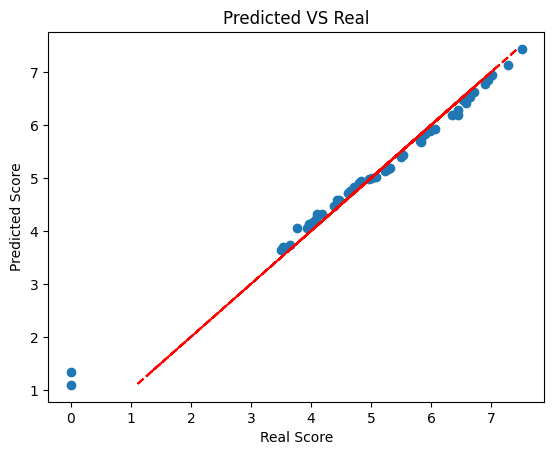

RANSAC
MSE:  1.275638933822636e-19
Score 1.0


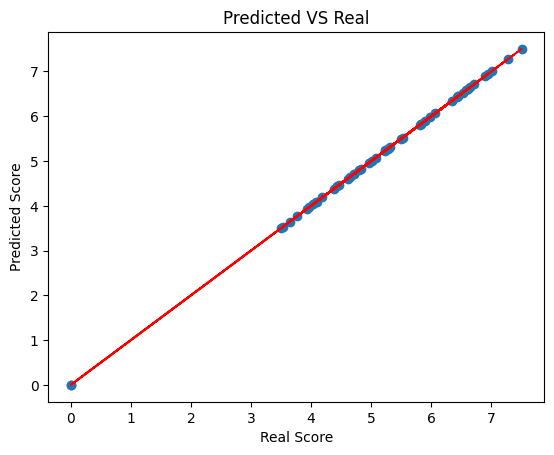

HUBER
MSE:  7.279452054792228e-07
Score 0.9999996726697775


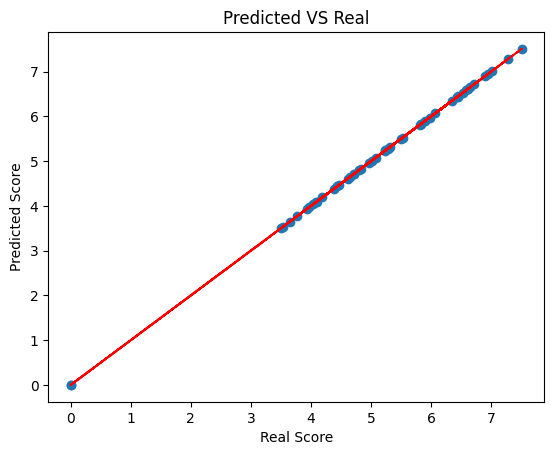

In [14]:
for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print("=" * 32)
    print(name)
    print("MSE: ", mean_squared_error(y_test, predictions))
    print("Score", estimador.score(X_test, y_test))
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r--')
    plt.show()